# DATA SCIENCE AND BUSINESS ANALYTICS Intern at The Sparks Foundation

## - By: Saugat Regmi

### Prediction using Unsupervised Machine Learning

From the given 'Iris' dataset, predict the optimum number of clusters and represent visually..

### Importing the required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

Getting the required datasets

In [2]:
iris = datasets.load_iris()
data_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data_iris.shape

(150, 4)

In [4]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
data_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Analyzing the Data

Firstly, let us perform some analysing the data by plotting scatter plot

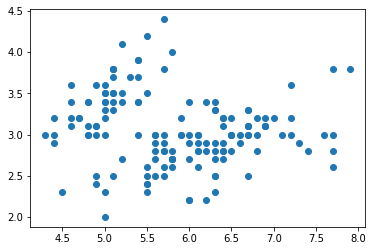

In [6]:
# Visualizing the first two columns
plt.scatter(data_iris['sepal length (cm)'],data_iris['sepal width (cm)'])
plt.show()

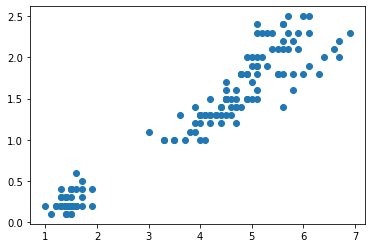

In [7]:
# Visualizing the last two columns
plt.scatter(data_iris['petal length (cm)'],data_iris['petal width (cm)'])
plt.show()

Here, we can observe 2 clusters as of now in both the plots.

### Finding the optimum numbers of clusters for K - Means and determining the value of K

In [8]:
x = data_iris.iloc[:, [0,1,2,3]].values

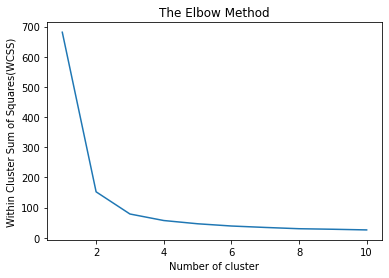

In [9]:
wcss = []                                 # WCSS: Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('Within Cluster Sum of Squares(WCSS)')
plt.show()

From the above graph,we can observe almost clear elbow tips 3. So, this might be the optimal one

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

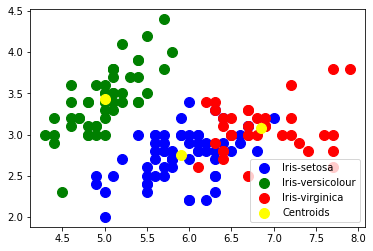

In [11]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'blue', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'green', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'red', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

After exploring selected input features 'sepal length (cm) & 'sepal width (cm)' I found 3-cluster solution as optimal.

With our well parameterized code, we can play using different inputs(like selecting the different features, trying different number of cluster) and analyze our data in different aspects

## End of Taks